# Throughput

## Import Data

In [9]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.5)
pd.set_option('display.max_rows', 100)

In [10]:
data_frames = []

for file in glob.glob("*_1.pausetimes.summary.bench"):
    with open(file) as f:
        data = []
        # From https://github.com/tarides/runtime_events_tools/blob/f080e98158183fce241625e6c3903bf9286b501c/bin/olly.ml#L23-L43
        percentiles = [25.0, 50.0, 60.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 96.0, 97.0, 98.0, 99.0, 99.9, 99.99, 99.999, 99.9999, 100.0]
        for l in f:
            if not l.strip(): continue
            temp = json.loads(l)
            if 'name' in temp:
                for p, l in zip(percentiles, temp['distr_latency']):
                    temp['latency_'+str(p)] = l
                del temp['distr_latency']
                data.append(temp)
        df = pd.json_normalize(data)
        df['variant'] = file.replace("_1.pausetimes.summary.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
df

,name,mean_latency,max_latency,latency_25.0,latency_50.0,latency_60.0,latency_70.0,latency_75.0,latency_80.0,latency_85.0,...,latency_96.0,latency_97.0,latency_98.0,latency_99.0,latency_99.9,latency_99.99,latency_99.999,latency_99.9999,latency_100.0,variant
3,LU_decomposition.1024,0,0,0.000247,0.001071,0.001239,0.001423,0.003727,0.003895,0.004015,...,0.004415,0.004503,0.004679,0.005655,0.012015,0.064639,0.125055,0.125055,0.125055,domain_sleep
1,LU_decomposition.1024,0,0,0.000231,0.000887,0.000967,0.001007,0.001031,0.001063,0.001095,...,0.001231,0.001271,0.001383,0.003647,0.005567,0.064543,0.090495,0.090495,0.090495,baseline
3,LU_decomposition.1024,0,0,0.000231,0.001087,0.001175,0.001319,0.003591,0.003767,0.003863,...,0.004199,0.004255,0.004343,0.004623,0.011591,0.106111,0.118847,0.118847,0.118847,with_background
1,LU_decomposition.1024,0,0,0.000295,0.001655,0.001783,0.001935,0.002015,0.002079,0.002151,...,0.002623,0.003359,0.003967,0.005231,0.014695,0.114111,0.116159,0.116159,0.116159,no_sleep
1,LU_decomposition.1024,0,0,0.000231,0.000895,0.000991,0.001031,0.001055,0.001087,0.001127,...,0.001263,0.001303,0.001383,0.003631,0.006871,0.073855,0.089791,0.089791,0.089791,baseline2
12,big_array_bench.big_array_int32_rev_1024_50000,0,0,0.000247,0.001311,0.001583,0.003415,0.003967,0.004071,0.004183,...,0.007135,0.007863,0.009559,0.012463,0.111743,0.137599,0.137599,0.137599,0.137599,with_background
10,big_array_bench.big_array_int32_rev_1024_50000,0,0,0.000615,0.002031,0.002271,0.002663,0.003015,0.003727,0.004015,...,0.007007,0.009239,0.010527,0.013663,0.119487,0.156543,0.156543,0.156543,0.156543,no_sleep
10,big_array_bench.big_array_int32_rev_1024_50000,0,0,0.000287,0.001111,0.001143,0.001175,0.001191,0.001223,0.001391,...,0.003967,0.004175,0.004575,0.005095,0.033375,0.039391,0.039391,0.039391,0.039391,baseline
10,big_array_bench.big_array_int32_rev_1024_50000,0,0,0.000311,0.001127,0.001159,0.001191,0.001215,0.001239,0.001375,...,0.003903,0.004135,0.004767,0.006095,0.057151,0.075263,0.075263,0.075263,0.075263,baseline2
11,big_array_bench.big_array_int32_rev_1024_50000,0,0,0.000263,0.001311,0.001559,0.003159,0.004031,0.004135,0.004255,...,0.007079,0.007583,0.009295,0.011967,0.109695,0.124287,0.124287,0.124287,0.124287,domain_sleep


<hr>

### (USER INPUT)  Baseline variant name

Please choose the baseline variant name for normalized graphs:

In [11]:
baseline = 'domain_sleep'

Ensure that the baseline is one of the variants. Returns Raises `ValueError` if the baseline is not present in the loaded data:

In [12]:
is_present = df["variant"].unique().tolist().index(baseline)

<hr>

## Latency (max)

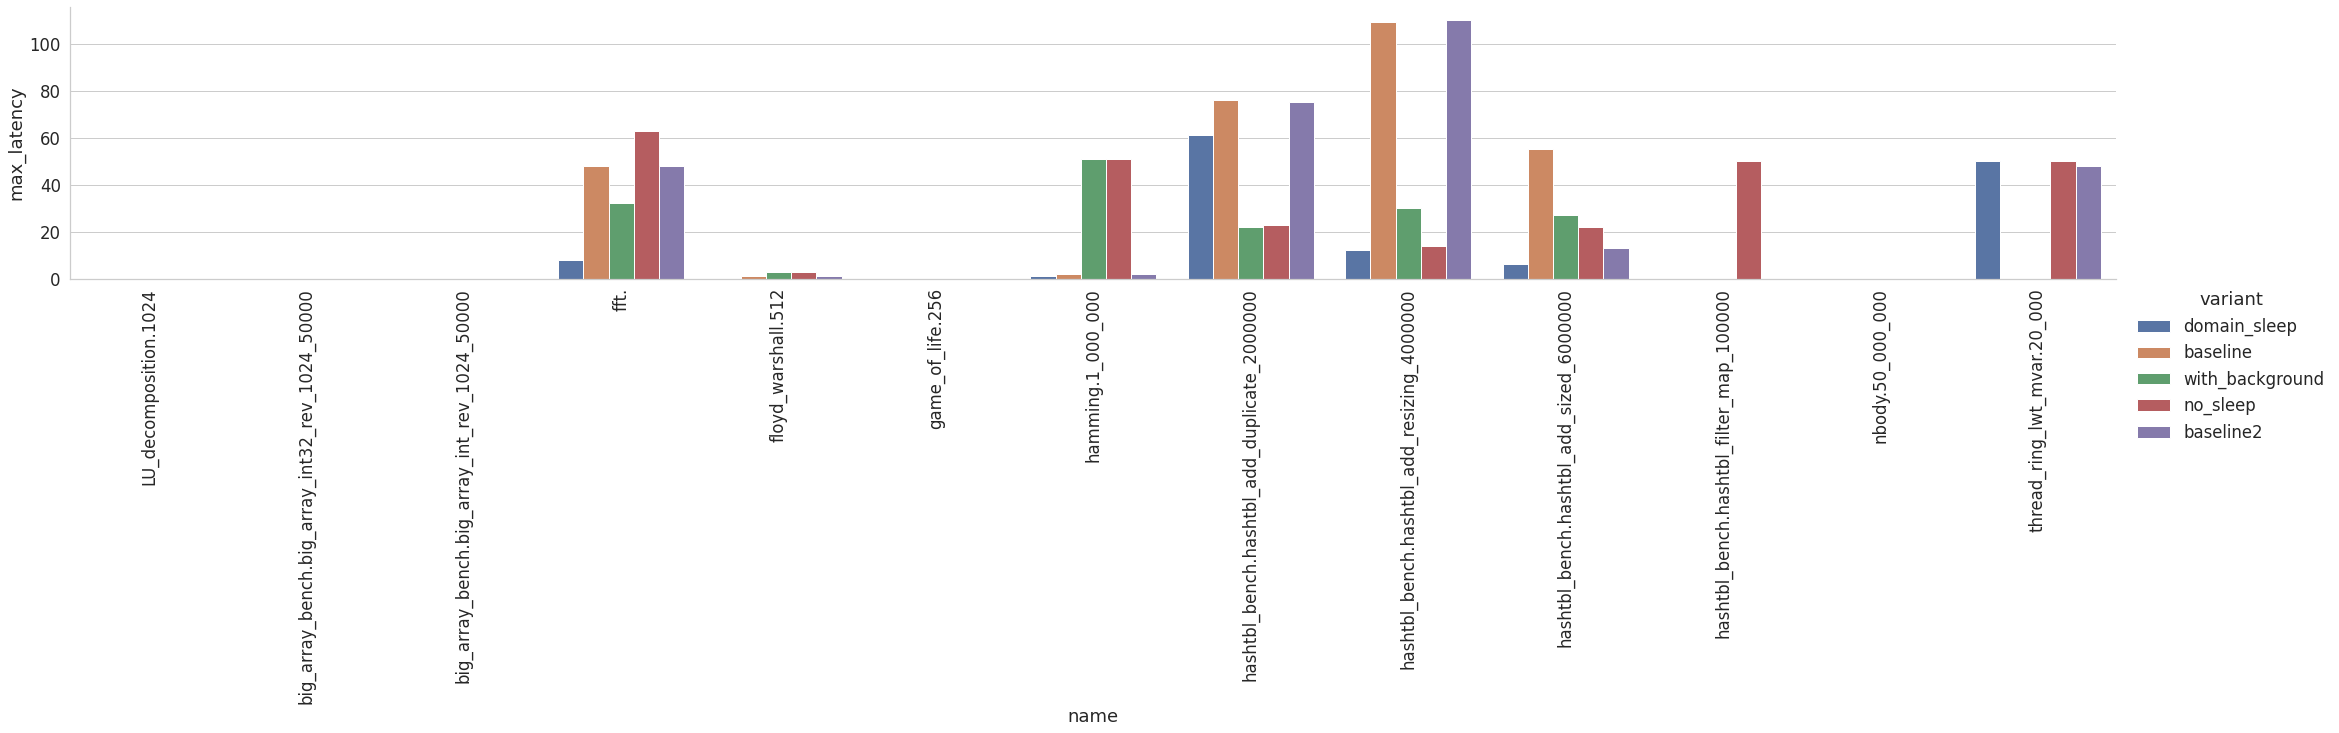

In [13]:
g = sns.catplot (x='name', y='max_latency', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

## Latency (99%)

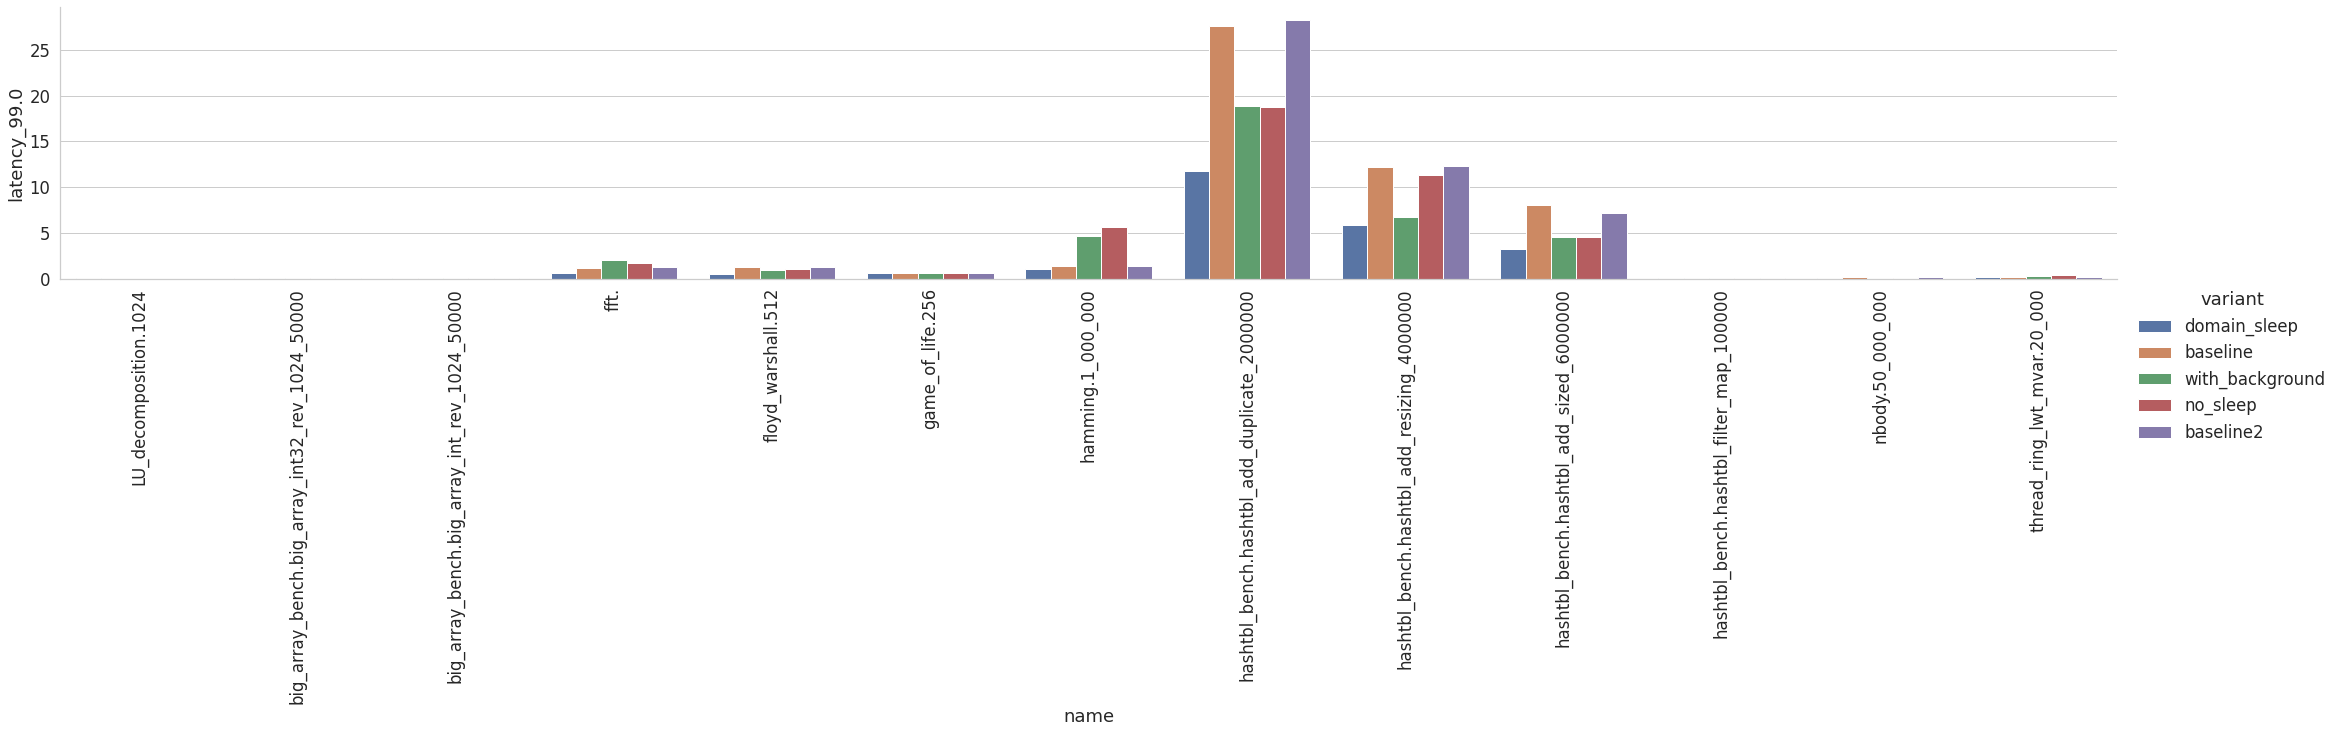

In [14]:
g = sns.catplot (x='name', y='latency_99.0', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

## Latency (90%)

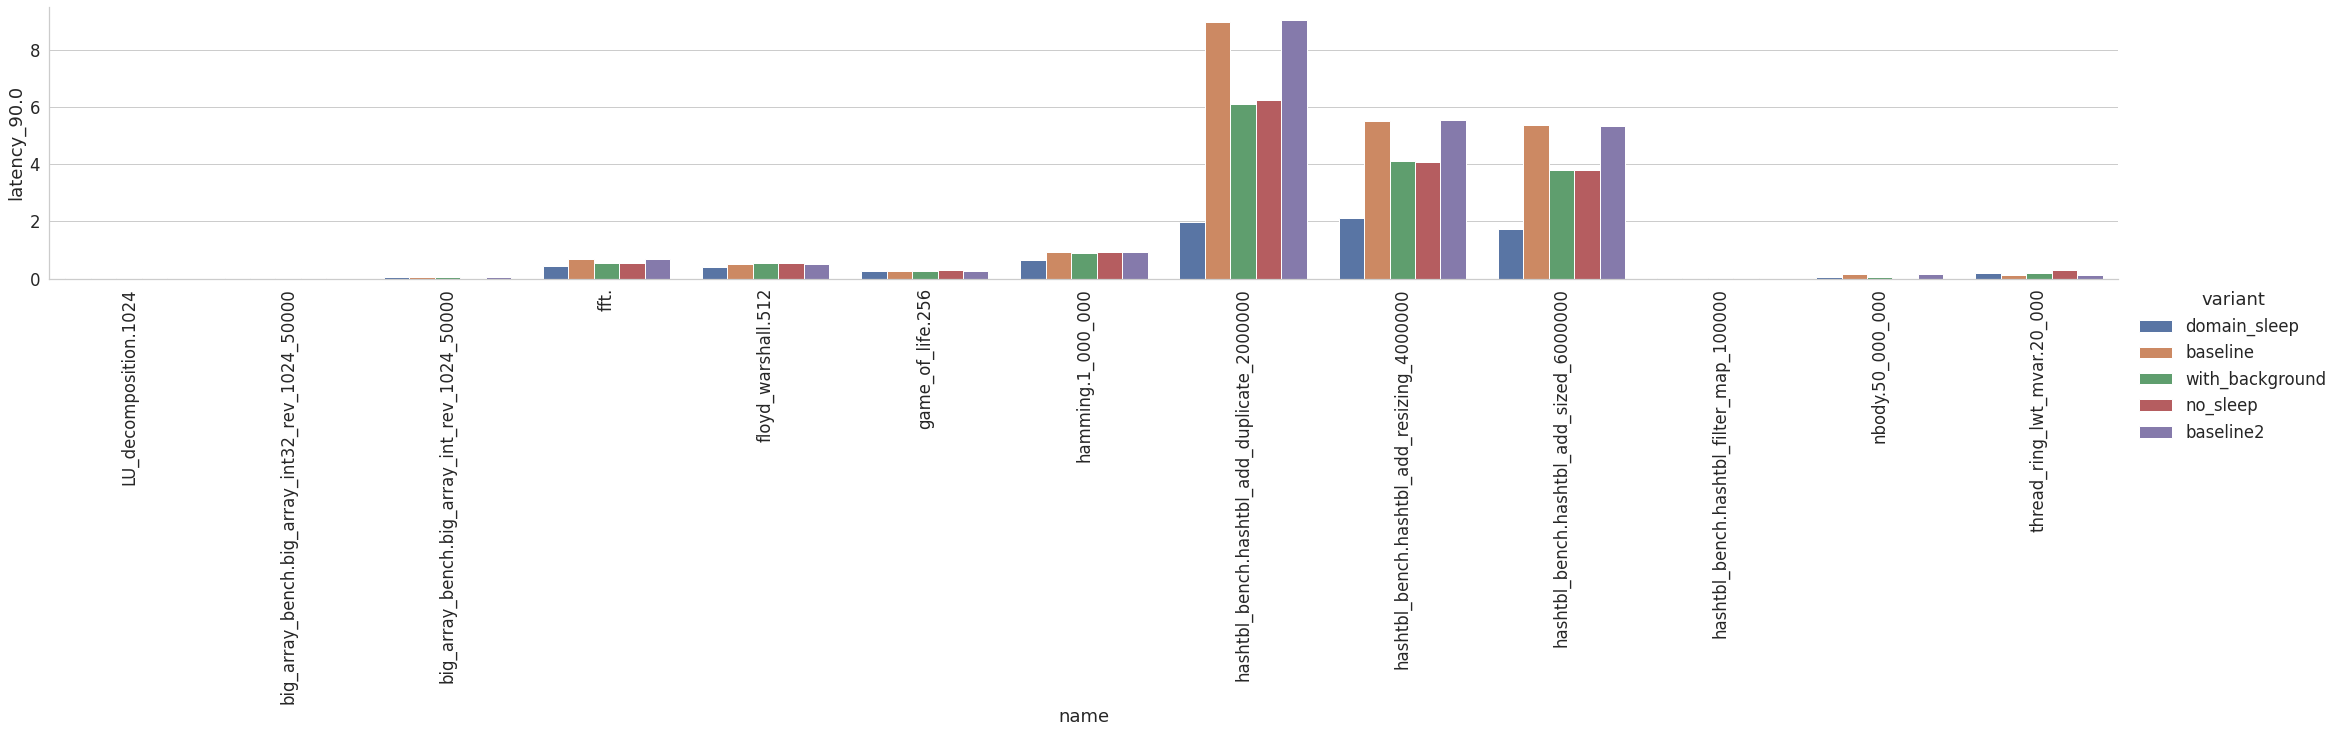

In [15]:
g = sns.catplot (x='name', y='latency_90.0', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

## Latency (50%)

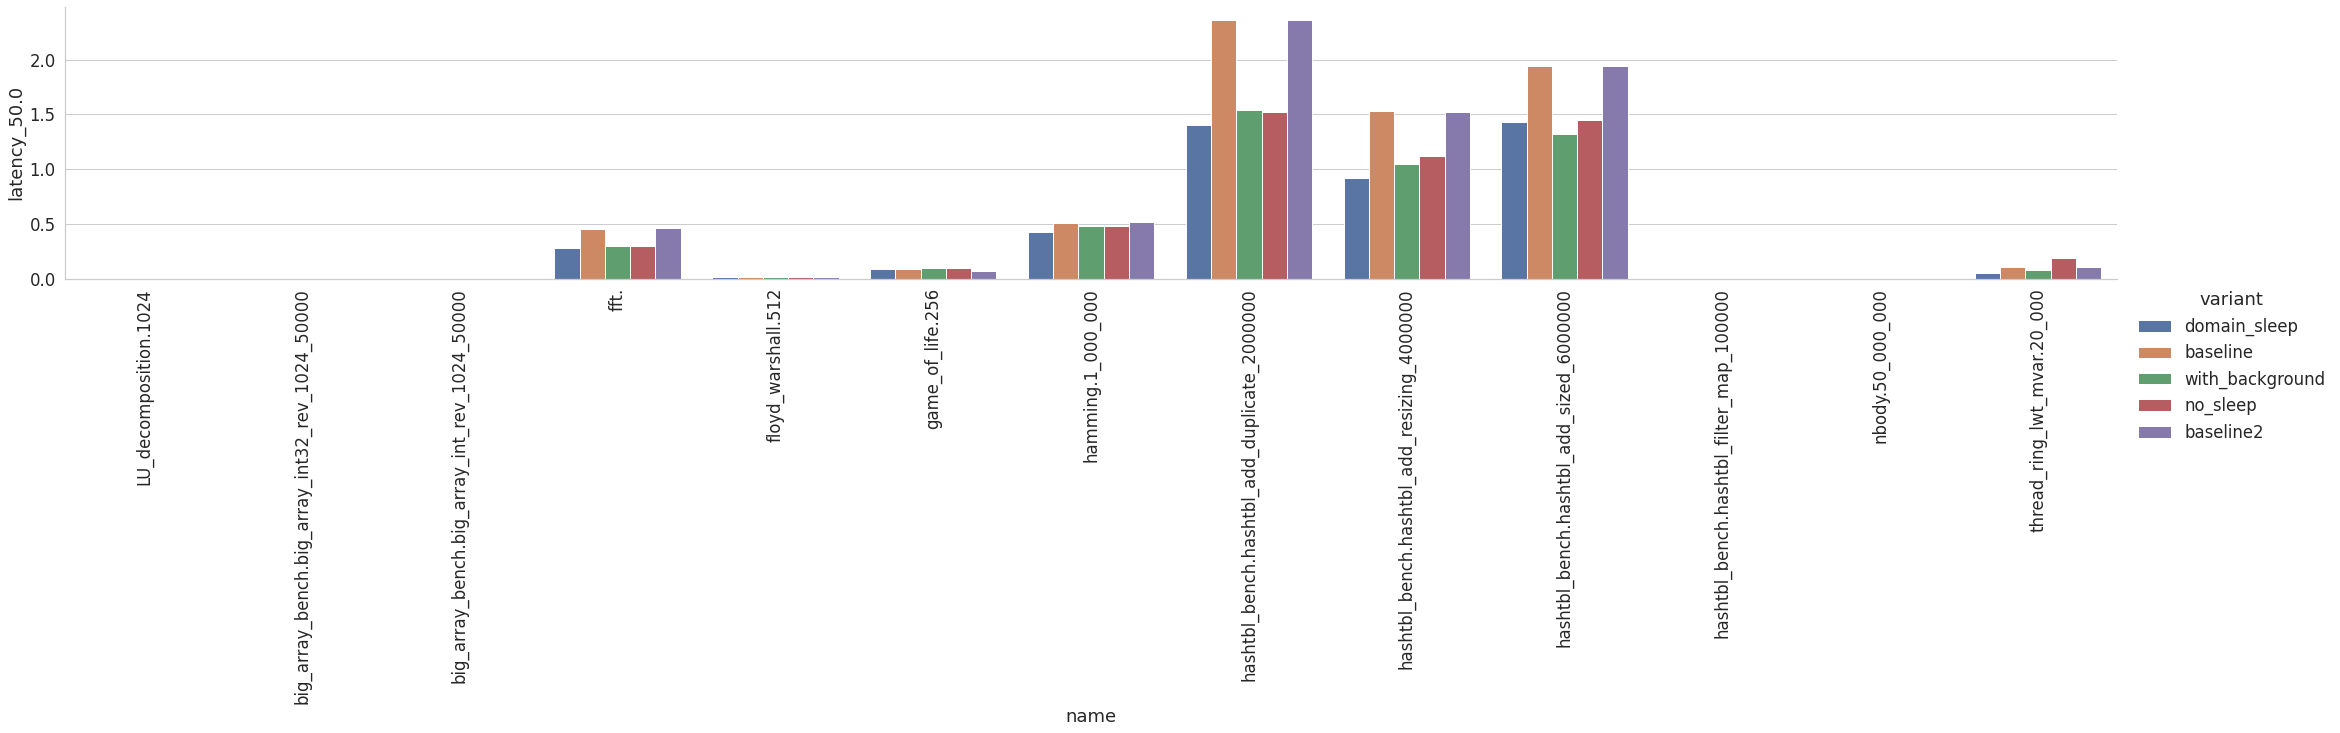

In [16]:
g = sns.catplot (x='name', y='latency_50.0', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)